# G2M insight for Cab Investment firm EDA Notebook 

# The client


XYZ is a private firm in US. Due to remarkable growth in the Cab Industry in last few years and multiple key players in the market, it is planning for an investment in Cab industry and as per their Go-to-Market(G2M) strategy they want to understand the market before taking final decision.

# Project delivery:

You have been provided with multiple data sets that contains information on 2 cab companies. Each file (data set) provided represents different aspects of the customer profile. XYZ is interested in using your actionable insights to help them identify the right company to make their investment.
<br>

The outcome of your delivery will be a presentation to XYZ’s Executive team. This presentation will be judged based on the visuals provided, the quality of your analysis and the value of your recommendations and insights.</code>

# Data Set:

* Cab_Data.csv – this file includes details of transaction for 2 cab companies. 
* Customer_ID.csv – this is a mapping table that contains a unique identifier which links the customer’s demographic details.
* Transaction_ID.csv – this is a mapping table that contains transaction to customer mapping and payment mode.
* City.csv – this file contains list of US cities, their population and number of cab users.

# Hypothesis Analysis:

* Does margin proportionally increase with increase in number of customers?
* What are the attributes of these customer segments?
* Which company has maximum cab users at a particular time period?
* What is the business problem?
* What are the properties of the data provided (data intake report)
* What steps did you take in order to create an applicable data set? How did you prepare and perform your analysis?
* What type of analysis did you perform? 
* Why did you choose to use certain analytical techniques over others?
* What were the results?







# Import Library 

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import datetime
import seaborn as sns
import requests
import io
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# Read CSV Files

In [2]:
url1 = "https://raw.githubusercontent.com/aperezace20/G2M-insight-for-Cab-Investment-firm-/main/Dataset/Cab_Data.csv"
# Downloading the csv file from GitHub account
download = requests.get(url1).content
# Reading the data
Cab_Data = pd.read_csv(io.StringIO(download.decode('utf-8')))

In [3]:
url2 = "https://raw.githubusercontent.com/aperezace20/G2M-insight-for-Cab-Investment-firm-/main/Dataset/City.csv" 
download = requests.get(url2).content
City = pd.read_csv(io.StringIO(download.decode('utf-8')))

In [4]:
url3 = "https://raw.githubusercontent.com/aperezace20/G2M-insight-for-Cab-Investment-firm-/main/Dataset/Customer_ID.csv" 
download = requests.get(url3).content
Customer_ID = pd.read_csv(io.StringIO(download.decode('utf-8')))

In [5]:
url4 = "https://raw.githubusercontent.com/aperezace20/G2M-insight-for-Cab-Investment-firm-/main/Dataset/Transaction_ID.csv"
download = requests.get(url4).content
Transaction_ID = pd.read_csv(io.StringIO(download.decode('utf-8')))

# Inspecting Data

In [6]:
Cab_Data.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip
0,10000011,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.635
1,10000012,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.854
2,10000013,42371,Pink Cab,ATLANTA GA,9.04,125.20,97.632
3,10000014,42376,Pink Cab,ATLANTA GA,33.17,377.40,351.602
4,10000015,42372,Pink Cab,ATLANTA GA,8.73,114.62,97.776


In [7]:
Cab_Data.tail()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip
359387,10440101,43108,Yellow Cab,WASHINGTON DC,4.80,69.24,63.3600
359388,10440104,43104,Yellow Cab,WASHINGTON DC,8.40,113.75,106.8480
359389,10440105,43105,Yellow Cab,WASHINGTON DC,27.75,437.07,349.6500
359390,10440106,43105,Yellow Cab,WASHINGTON DC,8.80,146.19,114.0480
359391,10440107,43102,Yellow Cab,WASHINGTON DC,12.76,191.58,177.6192


In [8]:
Cab_Data.shape

(359392, 7)

In [9]:
Cab_Data.isnull().sum()

Transaction ID    0
Date of Travel    0
Company           0
City              0
KM Travelled      0
Price Charged     0
Cost of Trip      0
dtype: int64

In [10]:
City.head()

,City,Population,Users
0,NEW YORK NY,"8,405,837","302,149"
1,CHICAGO IL,"1,955,130","164,468"
2,LOS ANGELES CA,"1,595,037","144,132"
3,MIAMI FL,"1,339,155","17,675"
4,SILICON VALLEY,"1,177,609","27,247"


In [11]:
City.tail()

,City,Population,Users
15,SACRAMENTO CA,"545,776","7,044"
16,PITTSBURGH PA,"542,085","3,643"
17,WASHINGTON DC,"418,859","127,001"
18,NASHVILLE TN,"327,225","9,270"
19,BOSTON MA,"248,968","80,021"


In [12]:
City.shape 

(20, 3)

In [13]:
City.isnull().sum()

City          0
Population    0
Users         0
dtype: int64

In [14]:
Customer_ID.head()

,Customer ID,Gender,Age,Income (USD/Month)
0,29290,Male,28,10813
1,27703,Male,27,9237
2,28712,Male,53,11242
3,28020,Male,23,23327
4,27182,Male,33,8536


In [15]:
Customer_ID.tail()

,Customer ID,Gender,Age,Income (USD/Month)
49166,12490,Male,33,18713
49167,14971,Male,30,15346
49168,41414,Male,38,3960
49169,41677,Male,23,19454
49170,39761,Female,32,10128


In [16]:
Customer_ID.shape 

(49171, 4)

In [17]:
Customer_ID.isnull().sum()

Customer ID           0
Gender                0
Age                   0
Income (USD/Month)    0
dtype: int64

In [18]:
Transaction_ID.head()

,Transaction ID,Customer ID,Payment_Mode
0,10000011,29290,Card
1,10000012,27703,Card
2,10000013,28712,Cash
3,10000014,28020,Cash
4,10000015,27182,Card


In [19]:
Transaction_ID.tail()

,Transaction ID,Customer ID,Payment_Mode
440093,10440104,53286,Cash
440094,10440105,52265,Cash
440095,10440106,52175,Card
440096,10440107,52917,Card
440097,10440108,51587,Card


In [20]:
Transaction_ID.shape 

(440098, 3)

In [21]:
Transaction_ID.isnull().sum()

Transaction ID    0
Customer ID       0
Payment_Mode      0
dtype: int64

# Data Cleaning and Visualization 

# 1. Does margin proportionally increase with increase in number of customers?

In [22]:
# What cab company is the most popular? 

In [23]:
Cab_Data['Company'].max()

'Yellow Cab'

<AxesSubplot:xlabel='Company', ylabel='Count'>

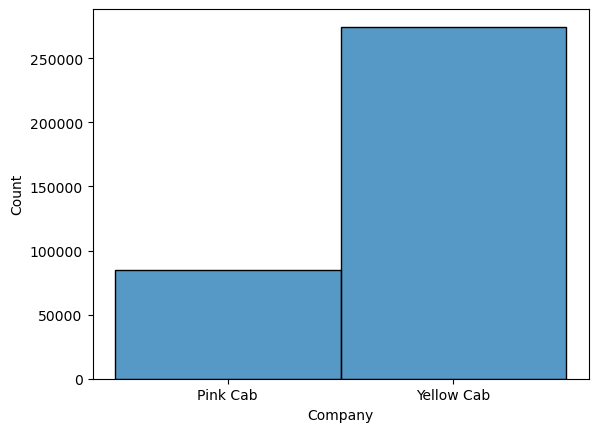

In [24]:
sns.histplot(Cab_Data['Company'])

<AxesSubplot:xlabel='Company', ylabel='Price Charged'>

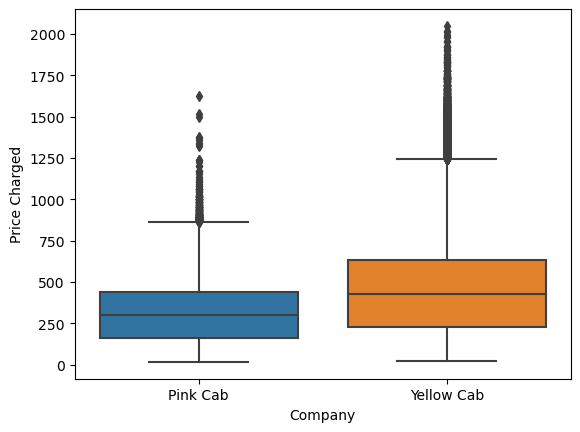

In [25]:
sns.boxplot(x='Company',y='Price Charged',data=Cab_Data)

# Answer: The margin proportionally does increase because the yellow cab has more customers and charges more than the pink cab.

# 2. What is the average price charged for Cab companies to customers? 

In [26]:
Cab_Data["Price Charged"].mean()

423.44331125901897

In [27]:
Cab_Data.describe()

,Transaction ID,Date of Travel,KM Travelled,Price Charged,Cost of Trip
count,3.593920e+05,359392.000000,359392.000000,359392.000000,359392.000000
mean,1.022076e+07,42964.067998,22.567254,423.443311,286.190113
std,1.268058e+05,307.467197,12.233526,274.378911,157.993661
min,1.000001e+07,42371.000000,1.900000,15.600000,19.000000
25%,1.011081e+07,42697.000000,12.000000,206.437500,151.200000
50%,1.022104e+07,42988.000000,22.440000,386.360000,282.480000
75%,1.033094e+07,43232.000000,32.960000,583.660000,413.683200
max,1.044011e+07,43465.000000,48.000000,2048.030000,691.200000


# The average price charge for Cab companies is $4.23.

# KM Travelled and Cost of Trip are correlated.

In [28]:
corr = Cab_Data.corr()
corr

,Transaction ID,Date of Travel,KM Travelled,Price Charged,Cost of Trip
Transaction ID,1.000000,0.993030,-0.001429,-0.052902,-0.003462
Date of Travel,0.993030,1.000000,-0.001621,-0.055559,-0.004484
KM Travelled,-0.001429,-0.001621,1.000000,0.835753,0.981848
Price Charged,-0.052902,-0.055559,0.835753,1.000000,0.859812
Cost of Trip,-0.003462,-0.004484,0.981848,0.859812,1.000000


Text(0.5, 1.0, 'Correlation Heatmap')

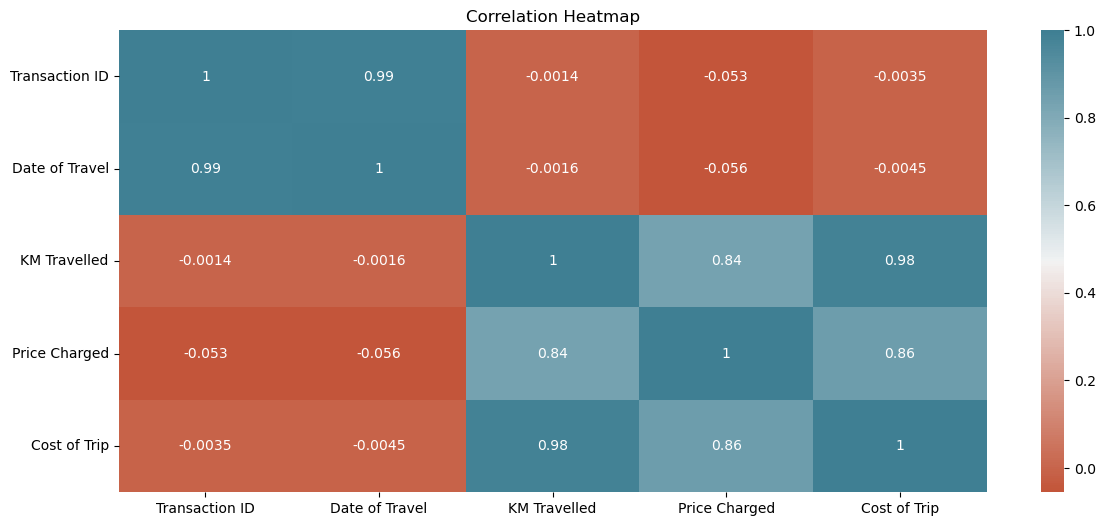

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(14, 6))
sns.heatmap(corr, annot = True,cmap = sns.diverging_palette(20, 220, n=200))
plt.title('Correlation Heatmap')

In [30]:
Cab_Data.dropna(inplace=True)
print(Cab_Data.shape)

(359392, 7)


In [31]:
Cab_Data.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip
0,10000011,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.635
1,10000012,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.854
2,10000013,42371,Pink Cab,ATLANTA GA,9.04,125.20,97.632
3,10000014,42376,Pink Cab,ATLANTA GA,33.17,377.40,351.602
4,10000015,42372,Pink Cab,ATLANTA GA,8.73,114.62,97.776


In [75]:
sns.boxplot(x='Price Charged',y='KM Travelled',data=Cab_Data)

ValueError: Could not interpret input 'Price Charged'

In [ ]:
sns.scatterplot(x='Price Charged', y='KM Travelled', data = Cab_Data, legend=False)

# 3. Which company has maximum cab users at a particular time period?

In [32]:
for col in Cab_Data.columns:
    if ' ' in col:
        Cab_Data = Cab_Data.rename(columns={col:col.replace(' ','_')})

In [33]:
Cab_Data.columns

Index(['Transaction_ID', 'Date_of_Travel', 'Company', 'City', 'KM_Travelled',
       'Price_Charged', 'Cost_of_Trip'],
      dtype='object')

In [34]:
from datetime import datetime, timedelta
def to_date_format(n):
    date_str =(datetime(1899,12,30) + timedelta(n-1)).strftime("%d-%m-%Y")
    date_date =  datetime.strptime(date_str, "%d-%m-%Y")
    return date_date

In [35]:
Cab_Data['Date_of_Travel'] = Cab_Data['Date_of_Travel'].apply(lambda x:to_date_format(x))

In [36]:
Cab_Data.head(2)

,Transaction_ID,Date_of_Travel,Company,City,KM_Travelled,Price_Charged,Cost_of_Trip
0,10000011,2016-01-07,Pink Cab,ATLANTA GA,30.45,370.95,313.635
1,10000012,2016-01-05,Pink Cab,ATLANTA GA,28.62,358.52,334.854


In [37]:
months=[]
years =[]
for i in range(len(Cab_Data['Date_of_Travel'])):
    months.append(Cab_Data['Date_of_Travel'][i].month)
    years.append(Cab_Data['Date_of_Travel'][i].year)
Cab_Data['Month'] = months
Cab_Data['Year'] = years

Cab_Data.drop('Date_of_Travel', axis=1, inplace=True)

In [38]:
PinkCab = Cab_Data[Cab_Data['Company']=='Pink Cab']
YellowCab = Cab_Data[Cab_Data['Company']=='Yellow Cab']

In [39]:
Cab_Data.head(3)

,Transaction_ID,Company,City,KM_Travelled,Price_Charged,Cost_of_Trip,Month,Year
0,10000011,Pink Cab,ATLANTA GA,30.45,370.95,313.635,1,2016
1,10000012,Pink Cab,ATLANTA GA,28.62,358.52,334.854,1,2016
2,10000013,Pink Cab,ATLANTA GA,9.04,125.20,97.632,1,2016


In [40]:
plot0 = Cab_Data[Cab_Data.Company=='Pink Cab'].groupby(['Month']).Transaction_ID.count()
plot0

Month
1      4825
2      3392
3      4228
4      4140
5      5023
6      5820
7      6585
8      8061
9      9647
10    10366
11    11324
12    11300
Name: Transaction_ID, dtype: int64

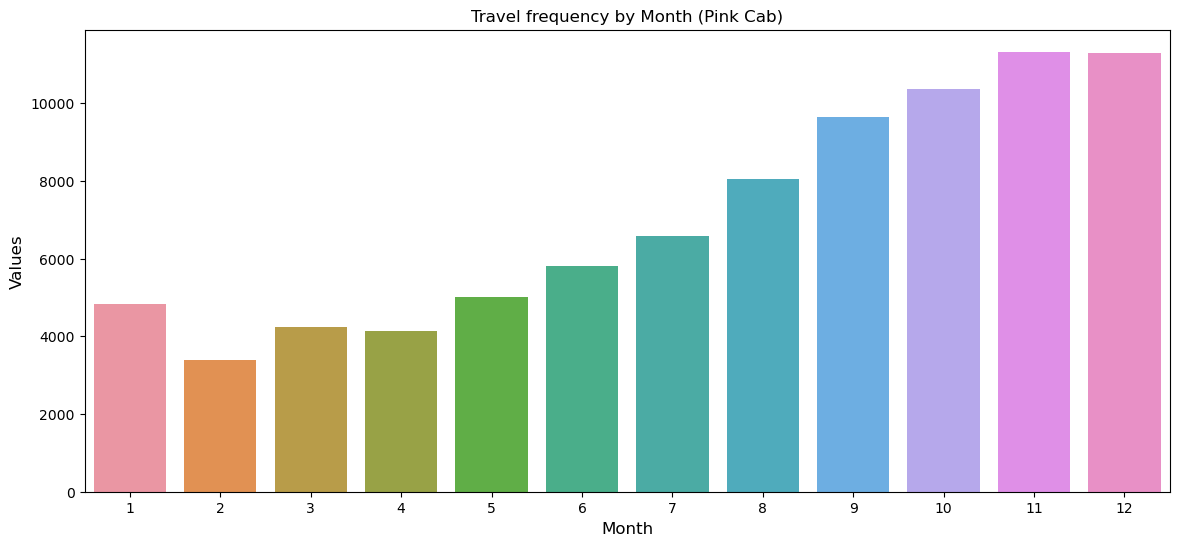

In [41]:
plt.figure(figsize=(14,6))
sns.barplot(x=plot0.index,y=plot0.values)
plt.title('Travel frequency by Month (Pink Cab)',fontsize = 12)
plt.xlabel('Month', fontsize = 12)
plt.ylabel('Values',fontsize = 12)
plt.show()

In [42]:
plot1 = Cab_Data[Cab_Data.Company=='Yellow Cab'].groupby(['Month']).Transaction_ID.count()
plot1

Month
1     17468
2     14928
3     17516
4     17535
5     18809
6     18656
7     21074
8     24328
9     27356
10    29609
11    32609
12    34793
Name: Transaction_ID, dtype: int64

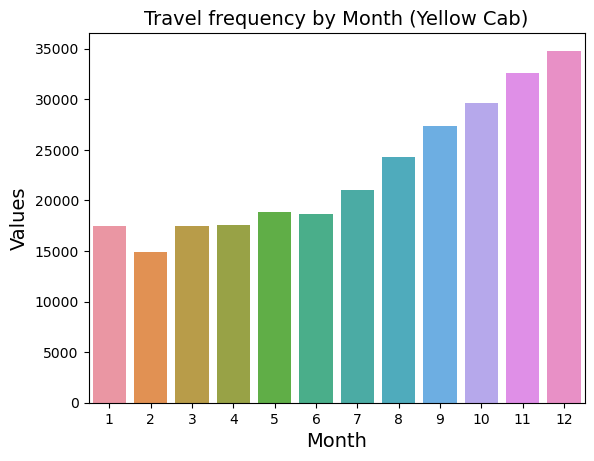

In [43]:
# plt.figure(figsize=(14,6))
sns.barplot(x=plot1.index,y=plot1.values)
plt.title('Travel frequency by Month (Yellow Cab)',fontsize = 14)
plt.xlabel('Month', fontsize = 14)
plt.ylabel('Values',fontsize = 14)
plt.show()

# Answer: The yellow cab has more customers in December during the holidays compared to the pink cab.

# 4. What are the attributes of these customer segments?

In [44]:
# K-means cluster and silhouette of Age and Income 

In [45]:
Customer_ID.head()

,Customer ID,Gender,Age,Income (USD/Month)
0,29290,Male,28,10813
1,27703,Male,27,9237
2,28712,Male,53,11242
3,28020,Male,23,23327
4,27182,Male,33,8536


In [46]:
Customer_ID.dtypes

Customer ID            int64
Gender                object
Age                    int64
Income (USD/Month)     int64
dtype: object

In [47]:
X= Customer_ID.iloc[:, [2,3]].values

In [48]:
X

array([[   28, 10813],
       [   27,  9237],
       [   53, 11242],
       ...,
       [   38,  3960],
       [   23, 19454],
       [   32, 10128]], dtype=int64)

In [49]:
# standardize features
from sklearn.preprocessing import StandardScaler

#create a scaler
scaler= StandardScaler()

# Apply the scaler
Customer_ID_std= scaler.fit_transform(X)
Customer_ID_std

array([[-0.58442393, -0.52518936],
       [-0.6637957 , -0.72213699],
       [ 1.39987038, -0.47157861],
       ...,
       [ 0.2092938 , -1.38158667],
       [-0.98128279,  0.55464856],
       [-0.26693684, -0.6107916 ]])

In [50]:
# K-means cluster analysis

In [51]:
# import library
from sklearn.cluster import KMeans

In [52]:
# elbow method to find the optimal k
wcss=[]
for i in range(1,11):
    kmeans = KMeans(n_clusters=i, init ='k-means++', n_init=10, max_iter=300, random_state=0)
    kmeans.fit(Customer_ID_std)
    wcss.append(kmeans.inertia_)

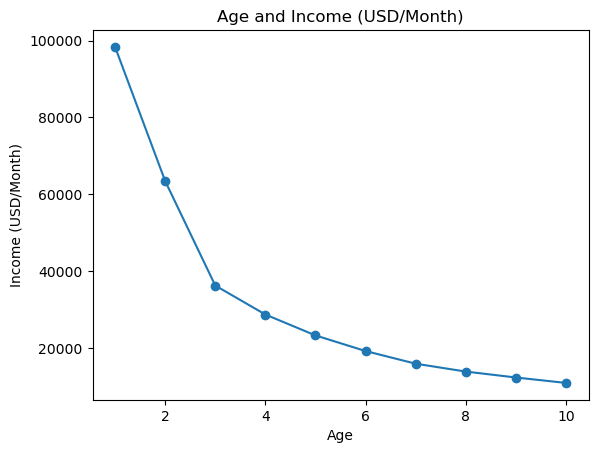

In [53]:
import matplotlib.pyplot as plt
plt.plot(range(1,11),wcss, marker = "o")
plt.title('Age and Income (USD/Month)')
plt.xlabel('Age')
plt.ylabel('Income (USD/Month)')
plt.show()

# Answer: People in their 30's that make around 30 thousand take more cabs. 

In [66]:
from sklearn.metrics import silhouette_score
for n_cluster in [4,5,6,7,8,9,10]:
    kmeans = KMeans(n_clusters=n_cluster).fit(Customer_ID_std)

silhouette_avg = silhouette_score(Customer_ID_std,kmeans.labels_)

print('Silhouette Score for %i Clusters: %0.4f' % (n_cluster, silhouette_avg))


Silhouette Score for 10 Clusters: 0.3605


In [67]:
km = KMeans(n_clusters= 5, init= 'k-means++', n_init= 10, max_iter= 300, random_state= 0).fit(Customer_ID_std)


In [68]:
clusters = km.fit_predict(Customer_ID_std)
clusters

array([3, 3, 0, ..., 3, 1, 3])

In [69]:
Customer_ID['label'] = clusters
Customer_ID

,Customer ID,Gender,Age,Income (USD/Month),label
0,29290,Male,28,10813,3
1,27703,Male,27,9237,3
2,28712,Male,53,11242,0
3,28020,Male,23,23327,2
4,27182,Male,33,8536,3
...,...,...,...,...,...
49166,12490,Male,33,18713,1
49167,14971,Male,30,15346,1
49168,41414,Male,38,3960,3
49169,41677,Male,23,19454,1


In [70]:
centroids = pd.DataFrame(km.cluster_centers_, columns = ['Age','Income (USD/Month)'])
centroids

,Age,Income (USD/Month)
0,1.432721,-0.794938
1,-0.480465,0.114235
2,-0.485459,1.304642
3,-0.498441,-1.059375
4,1.466284,0.864597


In [71]:
centroids['cluster'] = ['Cluster {}'.format(i) for i in centroids.index]
centroids

,Age,Income (USD/Month),cluster
0,1.432721,-0.794938,Cluster 0
1,-0.480465,0.114235,Cluster 1
2,-0.485459,1.304642,Cluster 2
3,-0.498441,-1.059375,Cluster 3
4,1.466284,0.864597,Cluster 4


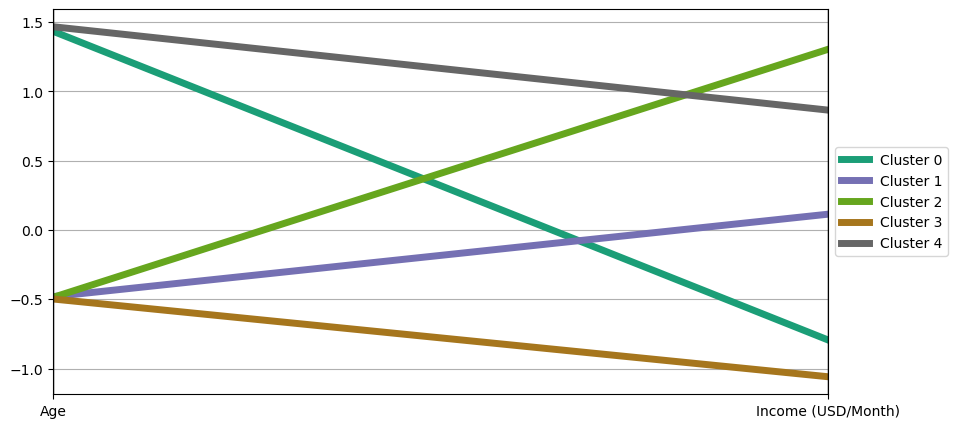

In [72]:
import matplotlib.pyplot as plt
from pandas.plotting import parallel_coordinates
#parallel coordinates visualization
plt.figure(figsize=(10,5))
parallel_coordinates(centroids, class_column='cluster', colormap='Dark2', linewidth=5)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

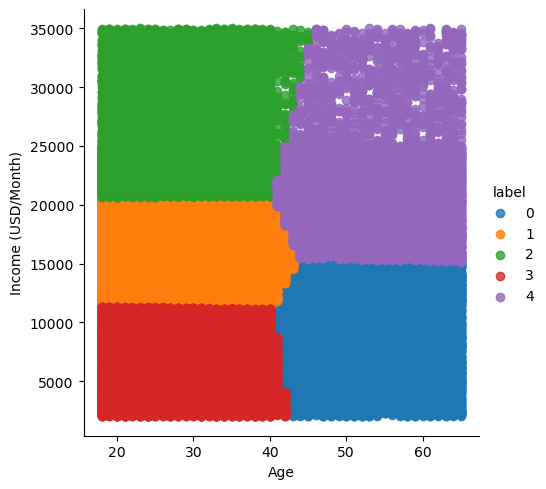

In [73]:
sns.lmplot(data=Customer_ID, x='Age', y='Income (USD/Month)', hue='label', fit_reg=False,legend=True)